# MVP

In [23]:
import pandas as pd
import ssd50 as ss
import matplotlib.pyplot as plt
import seaborn as sns
from gekko import GEKKO
import numpy as np

df=pd.read_excel('D50_data_add.xlsx', header=0)

In [24]:
df=df.set_index('minute')
df.head()

tons /hr  Feed_water  Mill_speed    Cyc_flow  Sump_water  \
minute                                                               
12.0    102.462509   15.509874   15.160000  525.208252   50.587109   
14.0    103.333893   16.375196   15.160000  529.151917   54.062538   
16.0    103.808968   16.706270   15.160000  527.527954   43.480278   
18.0    102.219231   17.050024   15.156041  520.946472   37.862888   
20.0    102.523087   16.613831   15.150989  520.562073   38.544147   

           Mill_BP1  Mill_power  Sump_level  Cyc_density  Cyc_pressure  \
minute                                                                   
12.0    6104.048340      2151.0   40.304512    54.255432     11.241975   
14.0    6108.159180      2155.0   43.349667    54.202900     11.241036   
16.0    6085.975586      2160.0   46.226486    54.150364     11.240097   
18.0    6116.854980      2153.0   38.813515    54.099995     11.239159   
20.0    6100.854492      2162.0   34.497410    54.051334     11.238220   

         tph_shift      D50C  
minute                        
12.0    102.936172  0.173972  
14.0    103.558838  0.173975  
16.0    104.628387  0.173978  
18.0    103.977753  0.173981  
20.0    102.229675  0.173984

In [25]:
da=df.copy()

da = df[(df['tons /hr'] > df['tons /hr'].quantile(0.05)) ] #& (df < upper_bound)]
avoid_off = da[(da > da.quantile(0.01)) & (da < da.quantile(0.99)) ]
avoid_off.plot(kind='line',subplots=True,layout=(15,1),figsize=(10,6))
plt.show();


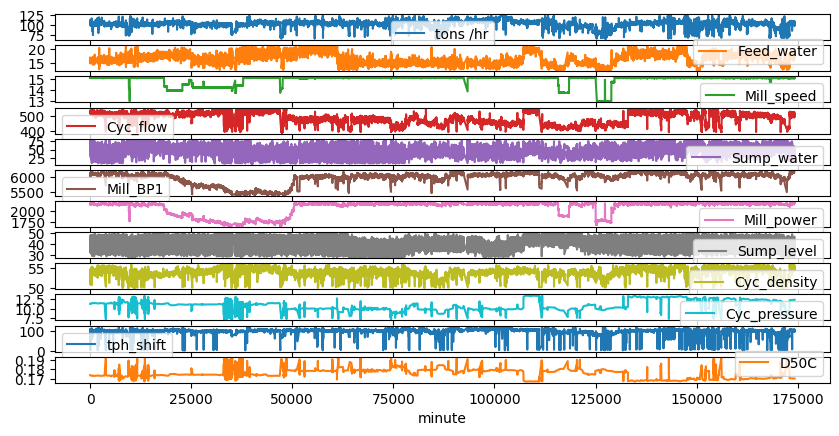

In [26]:
smooth_df = avoid_off.interpolate(method='slinear', limit_direction='both', axis=0)
smooth_df.plot(kind='line',subplots=True,layout=(15,1),figsize=(10,6))
plt.show();



In [48]:
smooth_df= smooth_df.drop('tph_shift',axis=1)
dfr = smooth_df.rolling(window=5, center=True).median()

# # Calculate a rolling 5-point average of the data
# df['rolling_average'] = df['data'].rolling(window=5, center=True).mean()

dfr=dfr.dropna()
#dfr=dfr.reset_index()
#dfr=dfr.drop('minute')
dfr.describe()

tons /hr    Feed_water    Mill_speed      Cyc_flow    Sump_water  \
count  82668.000000  82668.000000  82668.000000  82668.000000  82668.000000   
mean     102.156858     16.536488     14.974745    491.872589     47.113284   
std        8.525423      1.931011      0.443633     36.430170      9.235693   
min       65.133331     12.320619     12.957655    392.456614      9.837413   
25%      100.792900     14.944247     15.134733    462.457283     40.670101   
50%      103.799175     16.254557     15.145093    497.182678     46.512024   
75%      106.489243     17.977318     15.150904    522.668579     53.210205   
max      124.119648     21.040447     15.169526    549.885986     79.364250   

           Mill_BP1    Mill_power    Sump_level   Cyc_density  Cyc_pressure  \
count  82668.000000  82668.000000  82668.000000  82668.000000  82668.000000   
mean    5981.610701   2078.622928     39.903549     53.991593     10.912296   
std      191.709254    157.526107      2.855271      0.940182      1.248226   
min     5417.925781   1657.010811     29.091543     49.972080      7.216567   
25%     5972.185059   2123.000000     38.239742     53.554629      9.910948   
50%     6044.562988   2155.000000     39.979389     54.060471     10.997419   
75%     6097.212280   2167.000000     41.617634     54.608780     11.506966   
max     6196.239063   2199.000000     49.603778     56.013725     13.393332   

               D50C  
count  82668.000000  
mean       0.175424  
std        0.004411  
min        0.167397  
25%        0.173083  
50%        0.174816  
75%        0.178863  
max        0.191792

In [49]:
dfr.plot(kind='line',subplots=True,layout=(15,1),figsize=(10,6))
plt.show();

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = df.copy()
# Split into train and test subsets (30% for test)

train, test = train_test_split(data, test_size=0.3, shuffle=False)


s = StandardScaler()
dfs=df.copy()
s_train = s.fit_transform(train)  #whole dataframe ppossilbe


print('a: ', s.scale_)
print('Scaler mean')
print('b: ', s.mean_)


s_test = s.fit_transform(test)


# convert scaled values back to dataframe  
#This is a scaled training and test dataset

s_train_df = pd.DataFrame(s_train, columns=train.columns.values,index=train.index) #train index if partial
s_test_df = pd.DataFrame(s_test, columns=test.columns.values,index=test.index)




#Standard scaler
s_train_df.plot(kind='kde',subplots=True,layout=(6,2),figsize=(10,6))
plt.show()


a:  [ 25.8068144    6.85359566   2.89364397  95.64436439  16.11608503
 492.03740933 427.68456702  11.49925078   8.95157281   2.28090611
  25.80686971   0.52651324]
Scaler mean
b:  [9.77348347e+01 1.62229365e+01 1.43952585e+01 4.70052229e+02
 4.33095138e+01 5.88855348e+03 1.97541933e+03 4.08363293e+01
 5.21315513e+01 1.00073247e+01 9.77355636e+01 2.61952389e-01]


In [35]:


s_train_df.describe()

tons /hr    Feed_water    Mill_speed      Cyc_flow    Sump_water  \
count  6.095900e+04  6.095900e+04  6.095900e+04  6.095900e+04  6.095900e+04   
mean   7.161493e-16 -8.578872e-17  2.237967e-17  1.417379e-16  2.088769e-16   
std    1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00   
min   -3.787171e+00 -2.365441e+00 -4.974782e+00 -4.914584e+00 -2.667707e+00   
25%    1.170758e-01 -2.030314e-01  2.555514e-01 -1.569294e-01 -4.067749e-01   
50%    2.405249e-01 -6.600332e-02  2.566008e-01  1.673676e-01  5.846161e-02   
75%    3.609216e-01  2.304135e-01  2.622714e-01  5.266919e-01  5.419651e-01   
max    4.442479e+00  1.372168e+01  2.730149e-01  2.673037e+00  7.756936e+00   

           Mill_BP1    Mill_power    Sump_level   Cyc_density  Cyc_pressure  \
count  6.095900e+04  6.095900e+04  6.095900e+04  6.095900e+04  6.095900e+04   
mean   5.557617e-16 -6.191708e-16  9.697855e-17  6.042510e-16  5.147323e-16   
std    1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00   
min   -1.196769e+01 -4.618870e+00 -3.551216e+00 -5.823730e+00 -4.387429e+00   
25%   -1.408838e-01 -2.184304e-01 -4.107067e-01  1.393804e-01 -9.480251e-02   
50%    2.613897e-01  4.081996e-01 -6.854718e-02  1.962028e-01  2.428458e-02   
75%    3.796262e-01  4.409340e-01  2.468968e-01  2.481975e-01  5.005999e-01   
max    7.474278e-01  8.454377e-01  5.428187e+00  6.641008e-01  5.502539e+00   

          tph_shift          D50C  
count  6.095900e+04  6.095900e+04  
mean   4.848928e-16 -7.086894e-17  
std    1.000008e+00  1.000008e+00  
min   -3.787191e+00 -2.140395e-01  
25%    1.170819e-01 -1.664977e-01  
50%    2.405228e-01 -1.589464e-01  
75%    3.608926e-01 -1.569019e-01  
max    4.442441e+00  6.586080e+00

In [63]:


# load data and parse into columns

df = dfr.iloc[0:100000] #s_train_df
data = (df - df.min())/(df.max() - df.min())


n=len(data)
t = np.linspace(0,2*n-2,n)
u = data[['tons /hr', 'Feed_water', 'Mill_speed', 'Cyc_flow', 'Sump_water']]
y = data[['Mill_power','Sump_level', 'Cyc_density', 'Cyc_pressure', 'Mill_BP1','D50C']]



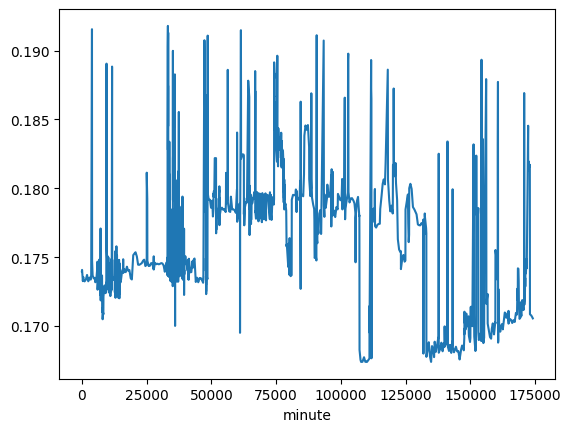

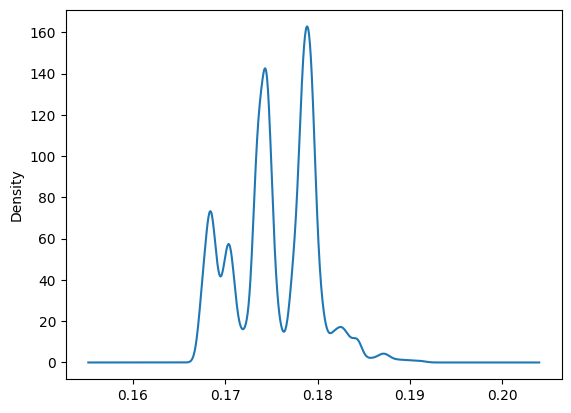

In [111]:
df['D50C'].plot()
plt.show()
df['D50C'].plot(kind='kde')
plt.show()

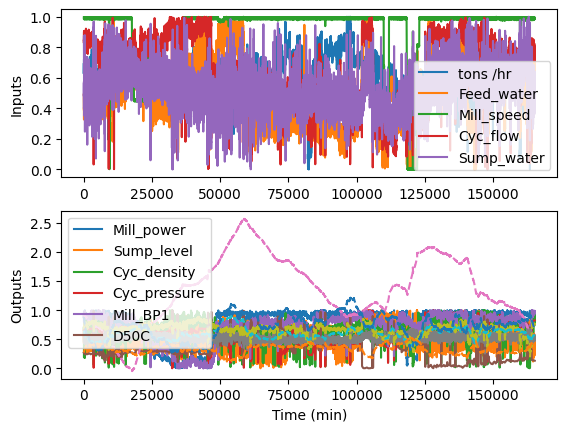

In [87]:
m = GEKKO()

# system identification
na = 2 # output coefficients
nb = 2 # input coefficients
nk = 6
yp,p,K = m.sysid(t,u,y,na,nb,pred='meas',objf=10000)

plt.figure()
plt.subplot(2,1,1)
plt.plot(t,u,label=r'')
plt.legend(['tons /hr', 'Feed_water', 'Mill_speed', 'Cyc_flow', 'Sump_water'])
plt.ylabel('Inputs')

plt.subplot(2,1,2)
plt.plot(t,y)
plt.plot(t,yp,'--')
plt.legend(['Mill_power','Sump_level', 'Cyc_density', 'Cyc_pressure', 'Mill_BP1','D50C'])
plt.ylabel('Outputs')
plt.xlabel('Time (min)')
plt.show()

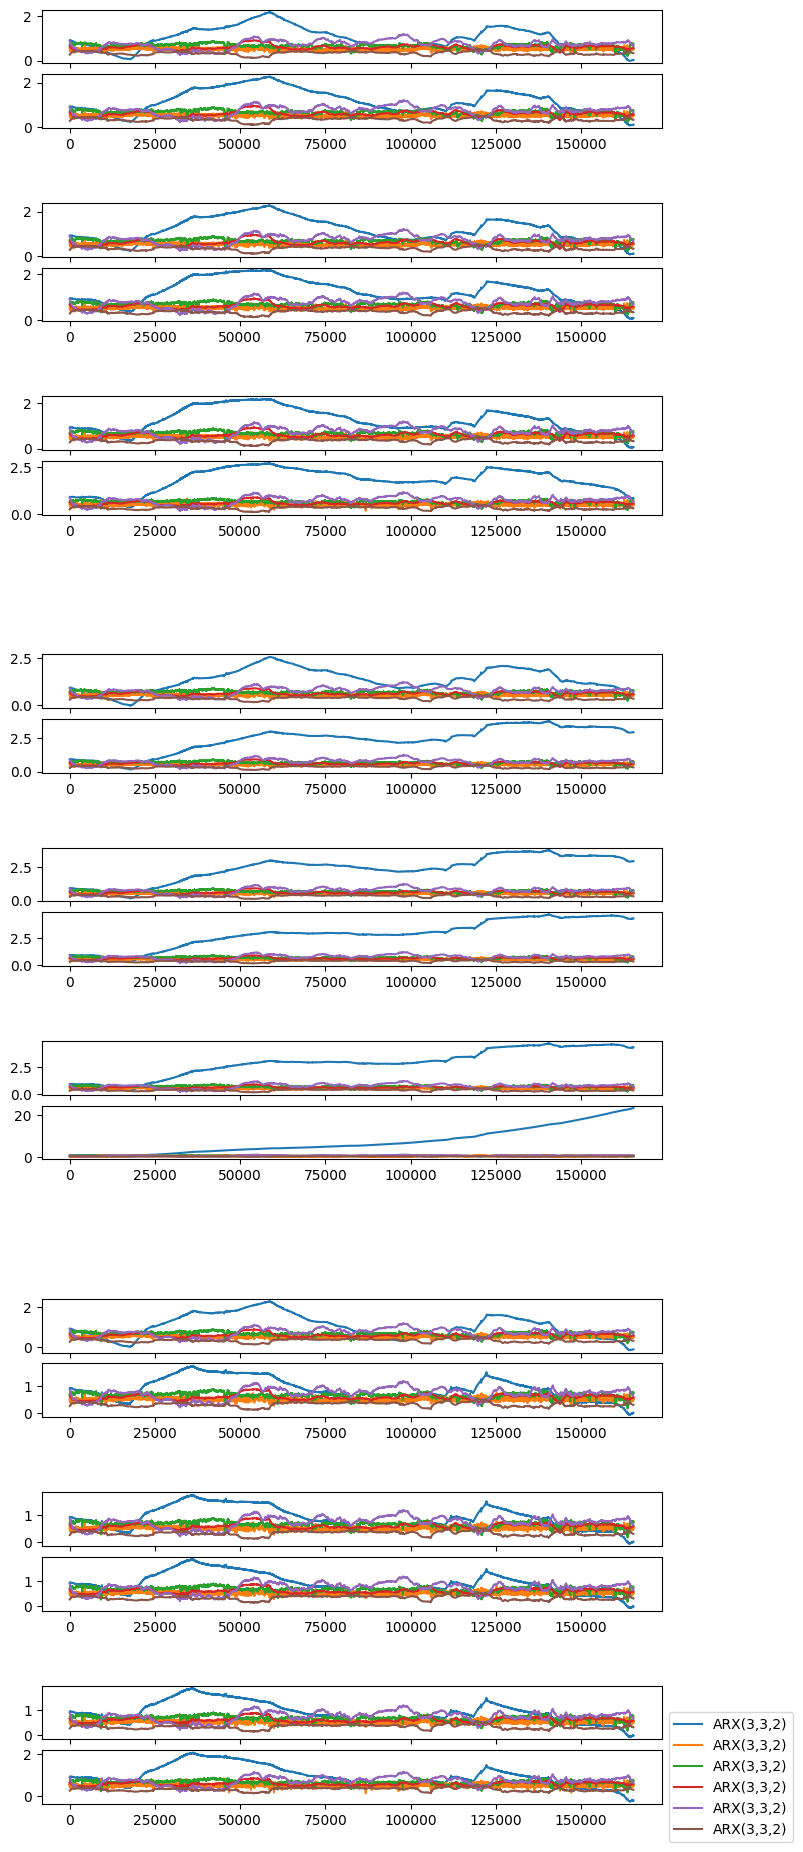

In [79]:
aval=np.array([])
pval=np.array([])
kval=np.array([])
plt.figure(0,figsize=(8,30));
j=-2
for na in [1, 2, 3]:
    j+=1
    for nb in [1, 2, 3]:
        j+=1
        for nk in [1, 2]:
            j+=1
            plt.subplot(36,1,j,)
            
            arx,p,K = m.sysid(t,u,y,na,nb,nk,pred='meas')
            #arx1.append(arx)
            np.append(aval,arx)
            np.append(pval,p)
            np.append(kval,K)
            plt.plot(t,arx,label=f'ARX({na},{nb},{nk})')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#             for i,n in enumerate(arx):
#                 plt.figure(i)
#                 plt.title(f'{n}')
#                 plt.plot(t,arx[i],label=f'ARX({na},{nb},{nk})')
#                 plt.legend();
            #for i in range(6):
            #    plt.plot(t[0:],arx,label=f'Output {i+1}')

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

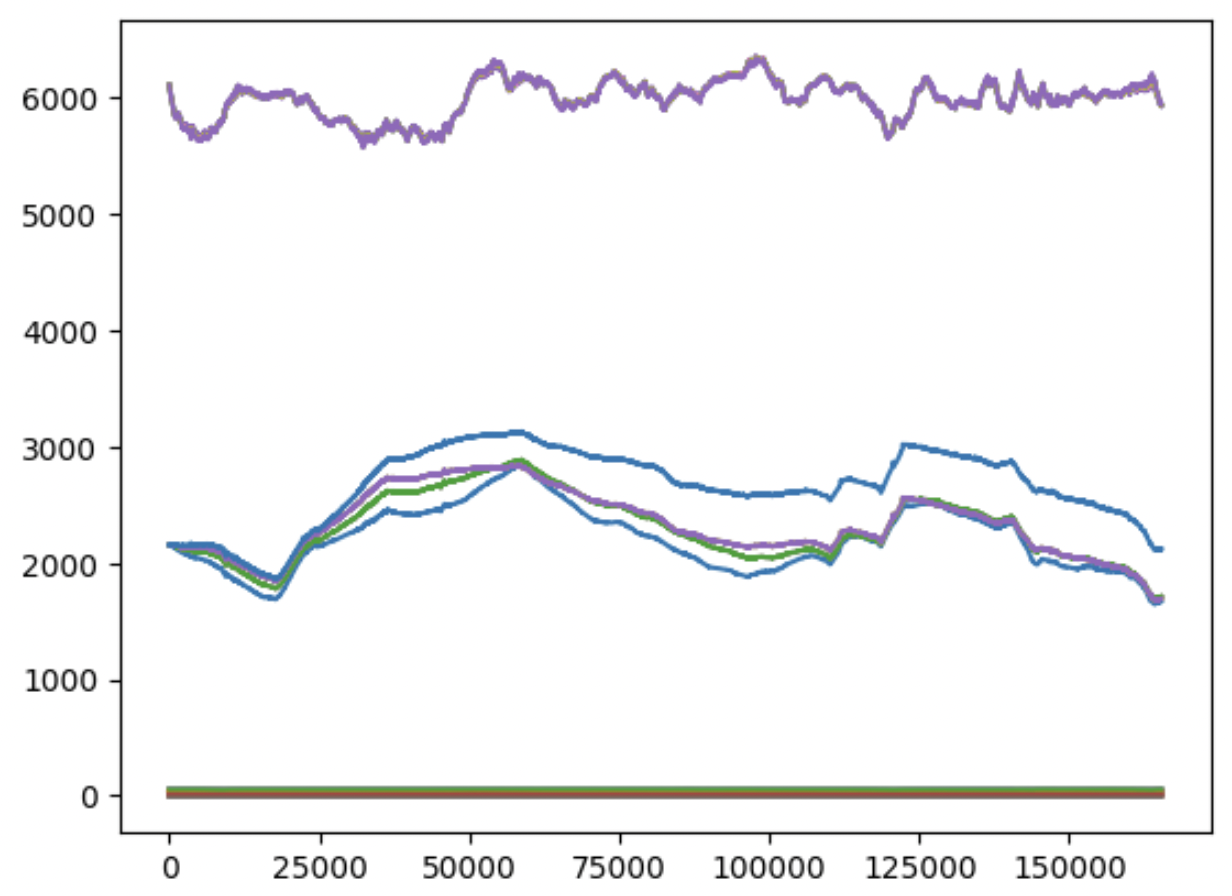
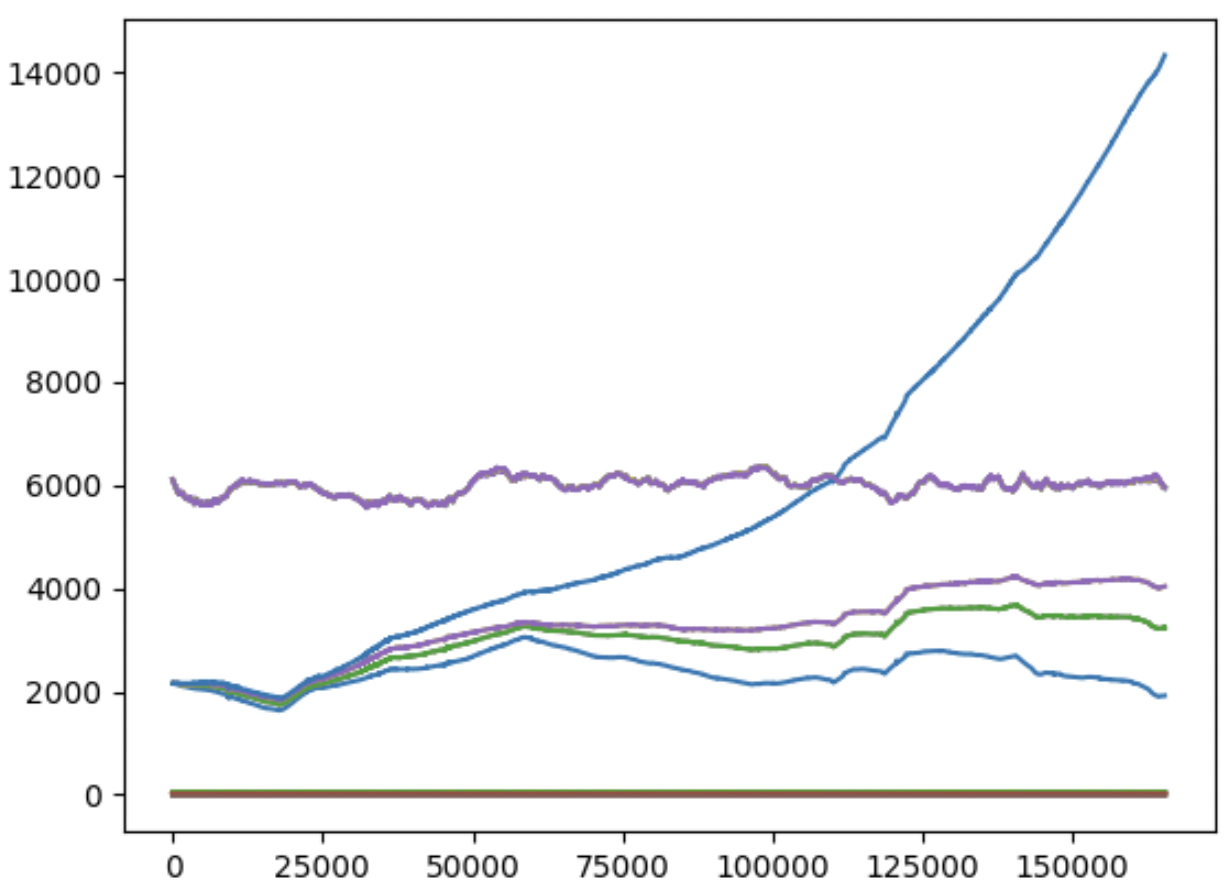
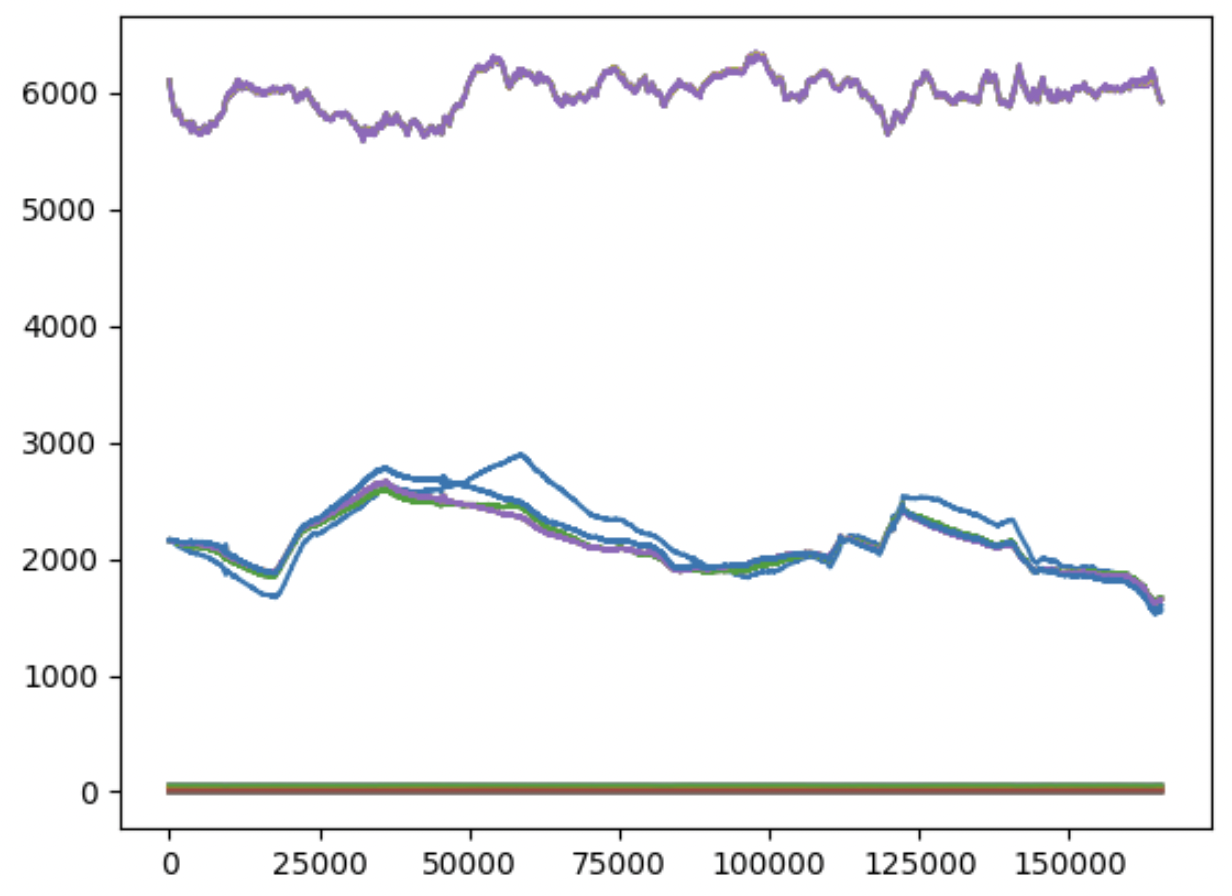


In [73]:
plt.figure(na);
j=-2
for na in [1, 2, 3]:
    j+=1
    for nb in [1, 2, 3]:
        j+=1
        for nk in [1, 2]:
            j+=1
            plt.subplot(27,1,j)
            plt.plot(t,aval[j],label=f'ARX({na},{nb},{nk})')
            
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

IndexError: index 1 is out of bounds for axis 0 with size 0

In [75]:
print(aval)

[]


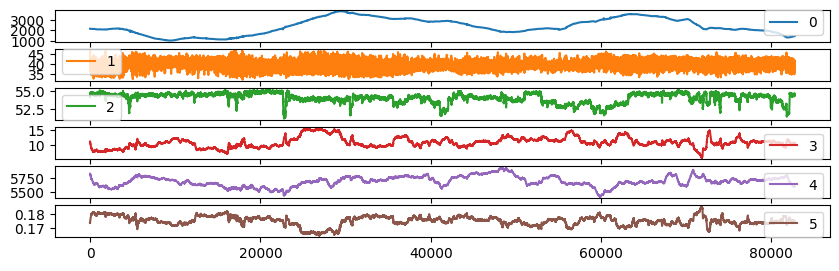

In [24]:
pd.DataFrame(yp).plot(kind='line',subplots=True,layout=(12,1),figsize=(10,6))
#DONT USE SUB PLOTS AND JUST COMPARE.
plt.title('Predicted Output');
plt.show()

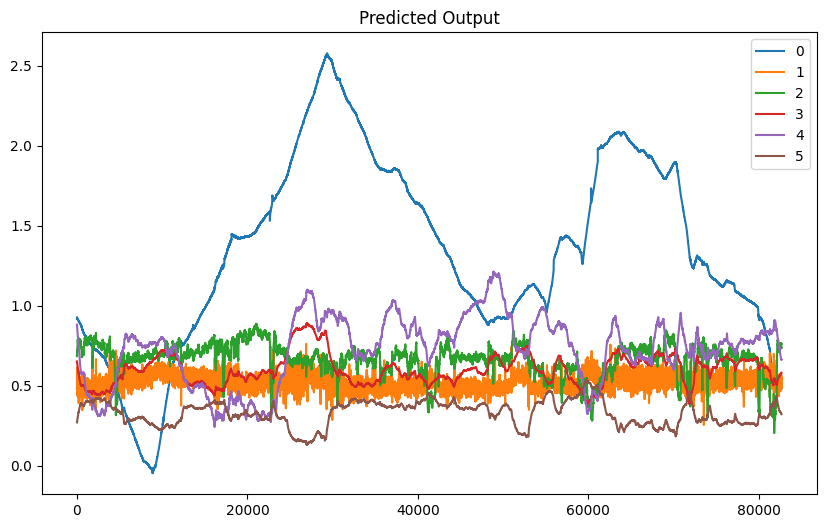

In [99]:
pd.DataFrame(yp).plot(kind='line',figsize=(10,6))

#DONT USE SUB PLOTS AND JUST COMPARE.
plt.title('Predicted Output');
plt.show()

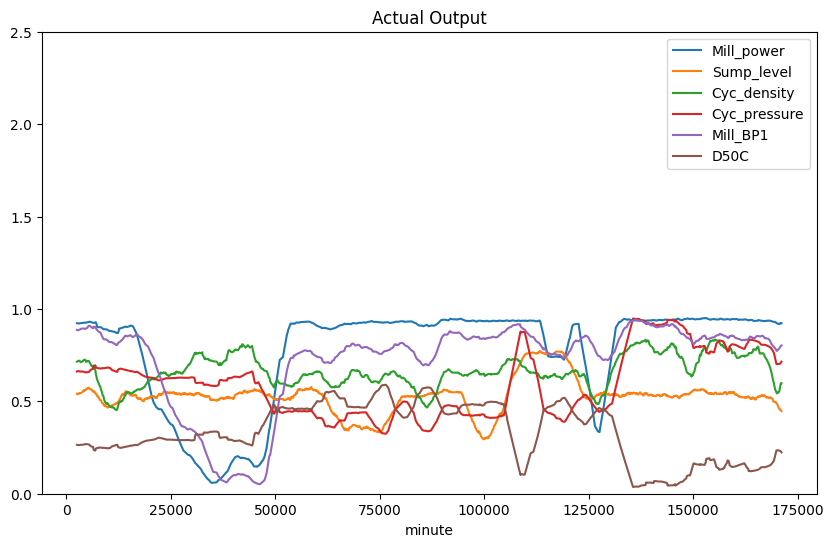

In [101]:
#.rolling(window=5, center=True).median()
pd.DataFrame(y[::50]).rolling(window=50,center=True).mean().plot(kind='line',figsize=(10,6))  #subplots=True,layout=(12,1),
plt.ylim(0,2.5)
plt.title('Actual Output');
plt.show()

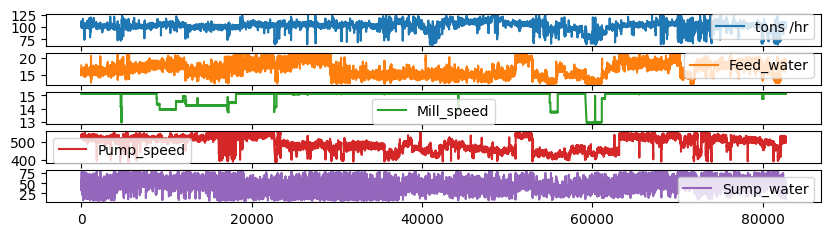

In [23]:
pd.DataFrame(u).plot(kind='line',subplots=True,layout=(12,1),figsize=(10,6))
plt.title('Input Variables')
plt.show()

In [3]:
n=len(data)
t = np.linspace(0,2*n,n)
print(t)

[0.00000000e+00 2.00002417e+00 4.00004835e+00 ... 1.65468000e+05
 1.65470000e+05 1.65472000e+05]
